Student name: Jianwei Su

Date: 06/10/2022

9.3

# This exercise uses the derived data created in 8.2.6 . 

In [1]:
import numpy as np
import pandas as pd

SP500=pd.read_csv('SP500.csv')
SP500.reset_index()

del SP500['Unnamed: 0']
del SP500['Adj Close']

SP500.head(10)

,Date,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume,Daily return,1-week (5-day) moving average daily return,Rolling cumulative sum of volume
0,2020-06-10,A,88.694260,0.0,89.454698,88.348609,89.197926,0.0,1410300.0,NaN,NaN,1410300.0
1,2020-06-10,AAL,17.020000,0.0,18.160000,15.920000,17.690001,0.0,163952500.0,-0.808105,NaN,165362800.0
2,2020-06-10,AAP,136.555191,0.0,140.387844,136.545454,140.387844,0.0,864900.0,7.023219,NaN,166227700.0
3,2020-06-10,AAPL,87.121864,0.0,87.598411,85.455181,85.902098,0.0,166651600.0,-0.362003,NaN,332879300.0
4,2020-06-10,ABBV,88.445374,0.0,90.681606,88.354100,88.527518,0.0,11138300.0,0.015191,NaN,344017600.0
5,2020-06-10,ABC,94.110657,0.0,97.634351,94.091246,97.440204,0.0,905000.0,0.064054,1.186471,344922600.0
6,2020-06-10,ABMD,250.850006,0.0,252.979996,244.589996,246.410004,0.0,409000.0,1.665479,1.681188,345331600.0
7,2020-06-10,ABT,89.432686,0.0,90.005222,87.957664,88.161448,0.0,5829100.0,-0.643481,0.147848,351160700.0
8,2020-06-10,ACN,204.174911,0.0,205.539791,200.733489,202.059364,0.0,2077200.0,1.283001,0.476849,353237900.0
9,2020-06-10,ADBE,406.820007,0.0,409.980011,399.489990,399.589996,0.0,3611600.0,0.992507,0.672312,356849500.0


# a.Plot the volume-weighted average daily returns using a line chart.


In [2]:
import matplotlib.pyplot as plt

SP500 = SP500.dropna()
data = pd.DataFrame(dtype=float)


data['Volume-weighted average daily returns'] = SP500.groupby(SP500['Date']).apply(lambda x: np.average(x['Daily return'], weights=x['Volume']))
data = data.reset_index()

data["Date"] = pd.to_datetime(data["Date"])

data = data.set_index('Date')

data

,Volume-weighted average daily returns
Date,
2020-06-10,0.260742
2020-06-11,0.212743
2020-06-12,0.233559
2020-06-15,0.213383
2020-06-16,0.161214
...,...
2022-06-06,0.413240
2022-06-07,0.313961
2022-06-08,0.454478


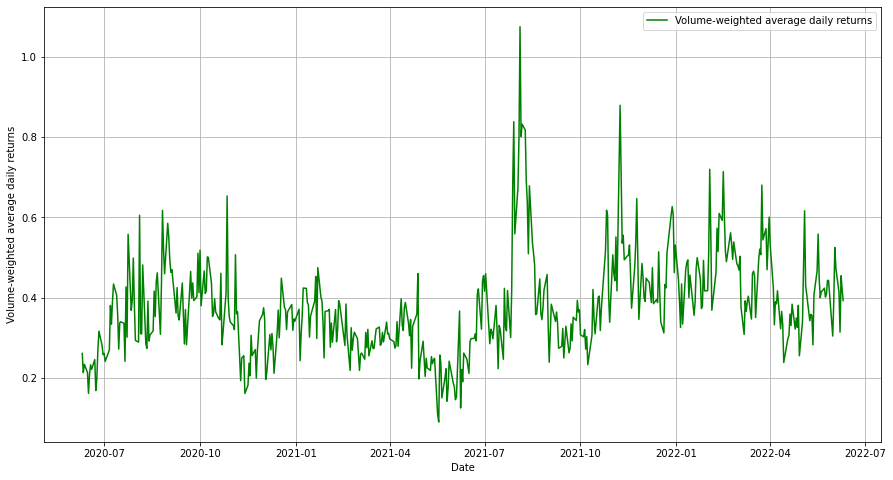

In [3]:
plt.figure(figsize=(15,8))

plt.plot(data[['Volume-weighted average daily returns']], 'g-')
plt.ylabel('Volume-weighted average daily returns')

plt.xlabel('Date')
plt.grid()
plt.legend(['Volume-weighted average daily returns'])

plt.show()

# b. Plot the moving average daily return in a separate line chart. Try using different moving windows and a gaussian smoother to see what gives you the best line without losing too much granularity.

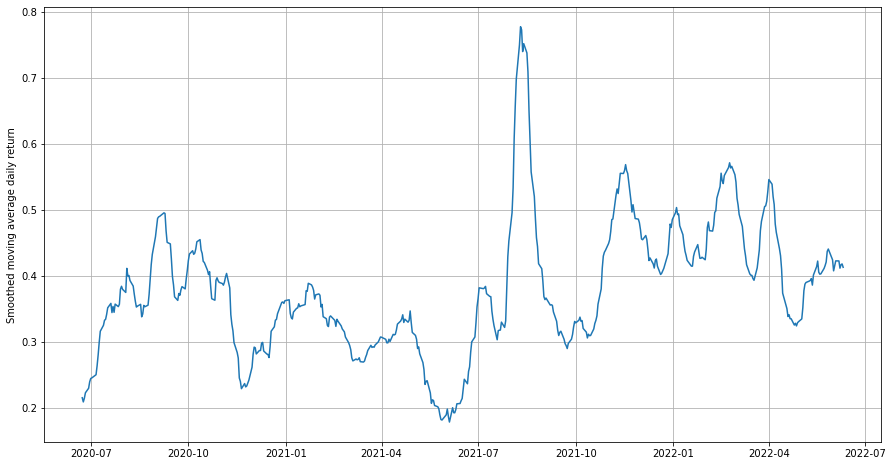

In [4]:
data['Smoothed moving average daily return'] = data['Volume-weighted average daily returns'].rolling(10).mean()

plt.figure(figsize=(15,8))
plt.plot(data[['Smoothed moving average daily return']])
plt.ylabel('Smoothed moving average daily return')
plt.grid()

plt.show()

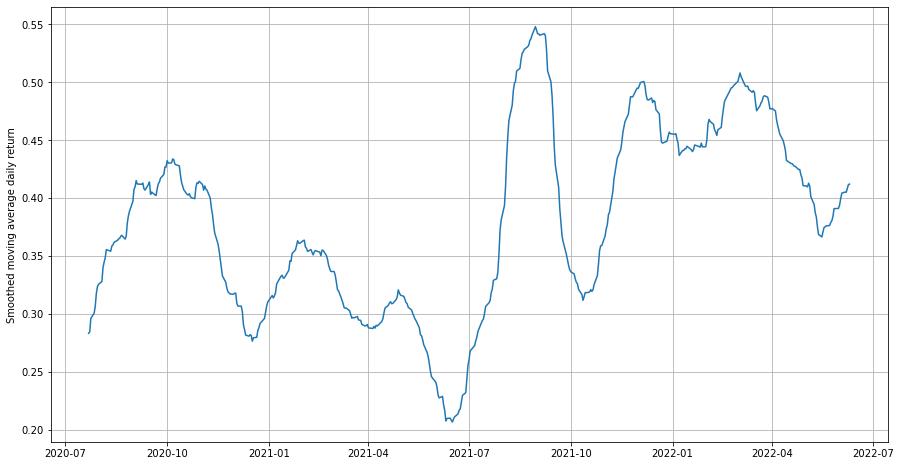

In [5]:
data['Smoothed moving average daily return'] = data['Volume-weighted average daily returns'].rolling(30).mean()

plt.figure(figsize=(15,8))
plt.plot(data[['Smoothed moving average daily return']])

plt.ylabel('Smoothed moving average daily return')
plt.grid()

plt.show()

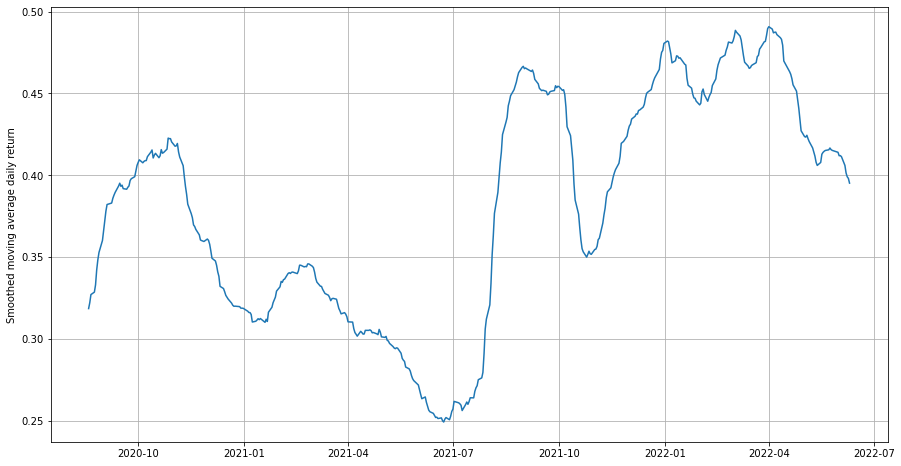

In [6]:
data['Smoothed moving average daily return'] = data['Volume-weighted average daily returns'].rolling(50).mean()

plt.figure(figsize=(15,8))
plt.plot(data[['Smoothed moving average daily return']])
plt.ylabel('Smoothed moving average daily return')
plt.grid()

plt.show()

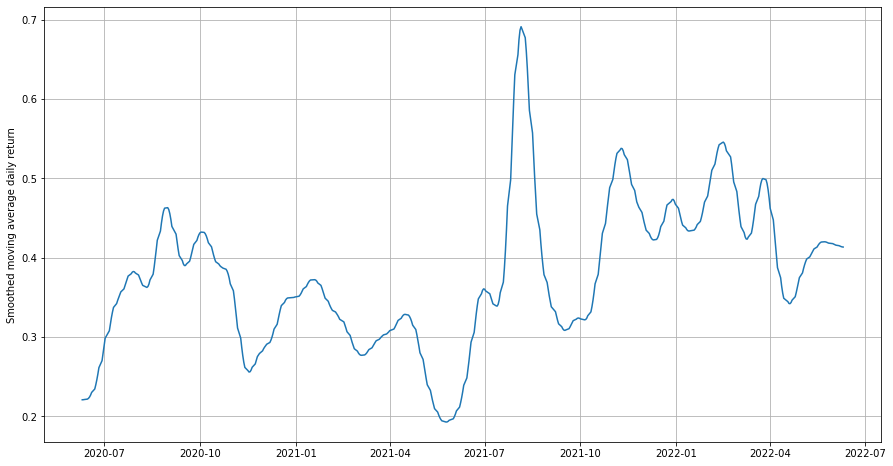

In [7]:
from scipy.ndimage import gaussian_filter

# More fair smoothing
data['Smoothed moving average daily return'] = gaussian_filter(data['Volume-weighted average daily returns'],5)
plt.figure(figsize=(15,8))
plt.plot(data[['Smoothed moving average daily return']])
plt.ylabel('Smoothed moving average daily return')
plt.grid()

plt.show()

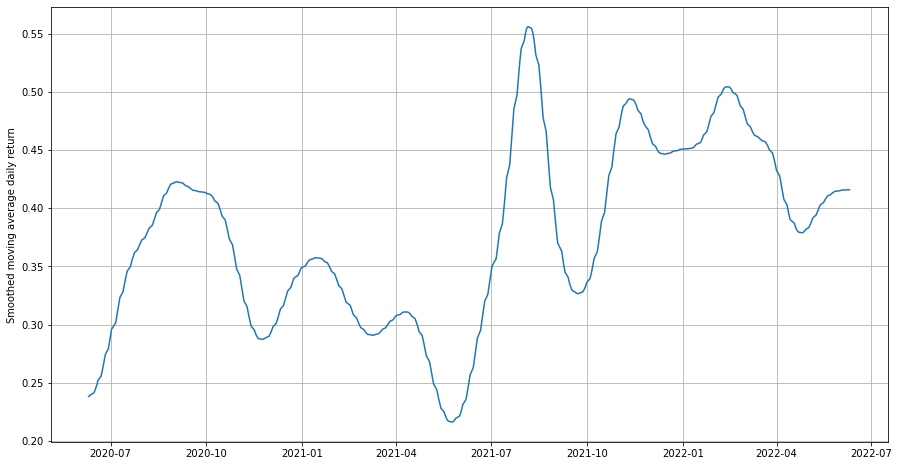

In [8]:
data['Smoothed moving average daily return'] = gaussian_filter(data['Volume-weighted average daily returns'],10)
plt.figure(figsize=(15,8))
plt.plot(data[['Smoothed moving average daily return']])
plt.ylabel('Smoothed moving average daily return')
plt.grid()

plt.show()


# I think this one is the best!

# c. Overlay the plots from a and b.

In [9]:
data

,Volume-weighted average daily returns,Smoothed moving average daily return
Date,,
2020-06-10,0.260742,0.238356
2020-06-11,0.212743,0.238865
2020-06-12,0.233559,0.239872
2020-06-15,0.213383,0.241378
2020-06-16,0.161214,0.243372
...,...,...
2022-06-06,0.413240,0.415694
2022-06-07,0.313961,0.415773
2022-06-08,0.454478,0.415822


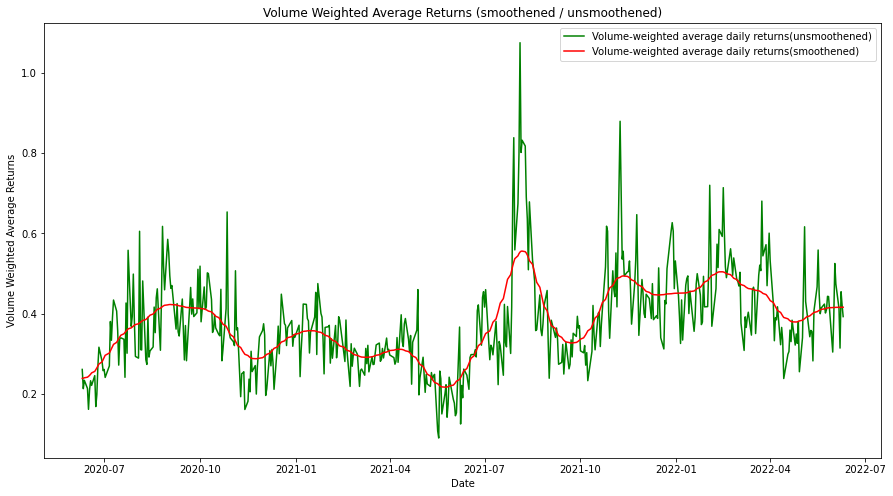

In [10]:
# Method 1

plt.figure(figsize=(15,8))


plt.plot(data[['Volume-weighted average daily returns']], 'g-')

plt.plot(data[['Smoothed moving average daily return']],'r')
plt.title('Volume Weighted Average Returns (smoothened / unsmoothened)')   
plt.ylabel('Volume Weighted Average Returns')
plt.xlabel('Date')

plt.legend(['Volume-weighted average daily returns(unsmoothened)', 'Volume-weighted average daily returns(smoothened)'])


plt.show()

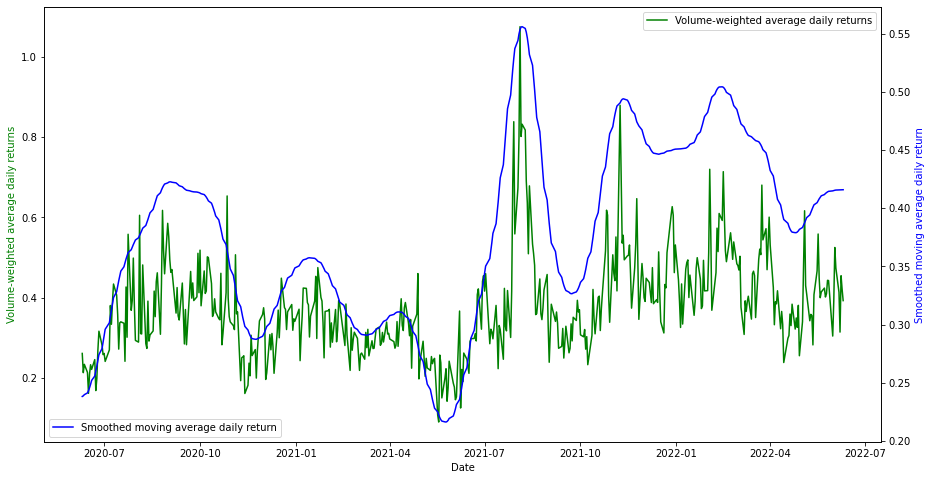

In [11]:
# Method 2
# I think this one is better

fig, ax1 = plt.subplots(figsize=(15,8))

ax2= ax1.twinx()
ax1.plot(data['Volume-weighted average daily returns'],'g-')
ax2.plot(data['Smoothed moving average daily return'],'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Volume-weighted average daily returns', color='g')
ax2.set_ylabel('Smoothed moving average daily return', color='b')

ax1.legend(['Volume-weighted average daily returns','Smoothed moving average daily return'], loc=1)
ax2.legend(['Smoothed moving average daily return'],loc=3)

plt.show()

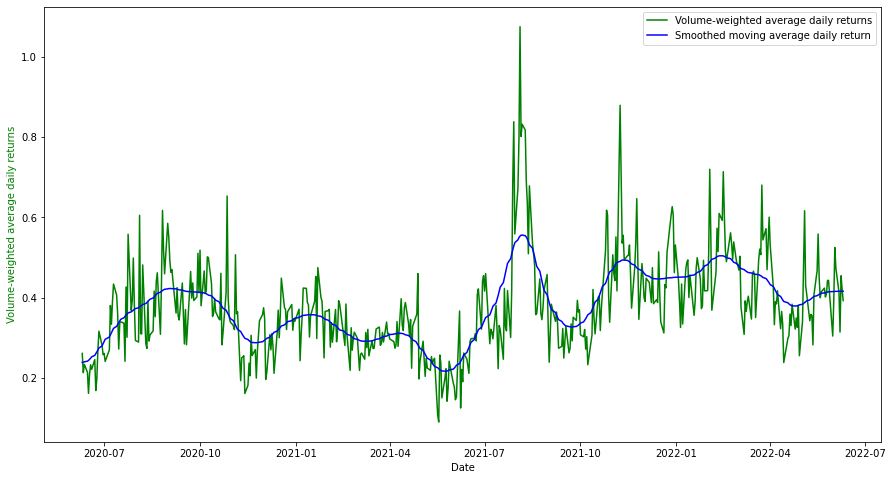

In [12]:
# Method 3
fig, ax1 = plt.subplots(figsize=(15,8))


ax1.plot(data['Volume-weighted average daily returns'],'g-',data['Smoothed moving average daily return'],'b-')


ax1.set_xlabel('Date')
ax1.set_ylabel('Volume-weighted average daily returns', color='g')


ax1.legend(['Volume-weighted average daily returns','Smoothed moving average daily return'], loc=1)

plt.show()

# The plot is as same as the firt method's. 

# d. Plot the moving average volume on the same plot.

In [13]:
data['Average Volume'] = SP500.groupby(['Date']).apply(lambda x: (np.average(x['Volume'])))

data

,Volume-weighted average daily returns,Smoothed moving average daily return,Average Volume
Date,,,
2020-06-10,0.260742,0.238356,6.937053e+06
2020-06-11,0.212743,0.238865,8.769748e+06
2020-06-12,0.233559,0.239872,7.285449e+06
2020-06-15,0.213383,0.241378,6.761026e+06
2020-06-16,0.161214,0.243372,6.971778e+06
...,...,...,...
2022-06-06,0.413240,0.415694,3.922972e+06
2022-06-07,0.313961,0.415773,4.250754e+06
2022-06-08,0.454478,0.415822,3.760583e+06


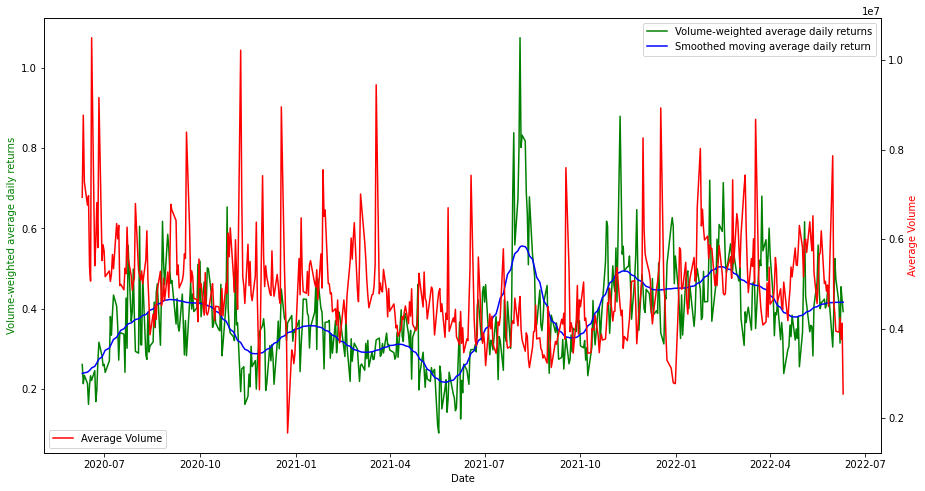

In [14]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax2= ax1.twinx()

ax1.plot(data['Volume-weighted average daily returns'],'g-',data['Smoothed moving average daily return'],'b-')
ax2.plot(data['Average Volume'],'r')

ax1.set_xlabel('Date')
ax1.set_ylabel('Volume-weighted average daily returns', color='g')

ax2.set_ylabel('Average Volume', color='r')


ax1.legend(['Volume-weighted average daily returns','Smoothed moving average daily return'], loc=1)
ax2.legend(['Average Volume'],loc=3)

plt.show()
